# Preliminar

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("Spotify con lyrics-v0.xlsx")
df

track_id                artists  \
0      3v6ypsJzaoY2xgYp6mMJfM                 !nvite   
1      1d4ZvL8uuUPTEAnocC3zEa                 !nvite   
2      4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3      5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4      6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
...                       ...                    ...   
89736  4xZIMRwaaBx7CZMmM6KLuh                    ÈªÉÂ∞èÁê•   
89737  1Q5d3X55pI7nBXYAdZ0g8Z                    ÈªÉÊïèËèØ   
89738  1t4LWH3LrFAwCTHgUKM16s                ÈæçËóèRyuzo   
89739  5Qn6Ys1fHlef8zgCLqCdud                ÈæçËóèRyuzo   
89740  1kR4gIb7nGxHPI3D2ifs59                    NaN   

                                  song  \
0                             pagadoff   
1                            strolling   
2                   Going on a Mission   
3      Puppy Dog Pals Main Title Theme   
4                  Good Enough for Now   
...                                ...   
89736                            Ê≤íÈÇ£È∫ΩÁ∞°ÂñÆ   
89737                               Â†§Â≤∏   
89738             Á¥ÖËìÆ„ÅÆÂºìÁü¢ (Instrumental)   
89739           „Ç≤„Ç≤„Ç≤„ÅÆÈ¨ºÂ§™ÈÉé (Instrumental)   
89740                              NaN   

                                                  lyrics  
0                                                    NaN  
1                                                    NaN  
2      Let's go!\n ‚ô™\n On your bark, get ready, got a...  
3      Bingo and Rolly, couple of puppies\n They bark...  
4      Oh, I couldn't live a single day without you\n...  
...                                                  ...  
89736  Ê≤íÈÇ£È∫ºÁ∞°ÂñÆ Â∞±ËÉΩÊâæÂà∞ ËÅäÂæó‰æÜÁöÑ‰º¥\n Â∞§ÂÖ∂ÊòØÂú® ÁúãÈÅé‰∫ÜÈÇ£È∫ºÂ§öÁöÑËÉåÂèõ\n Á∏ΩÊòØ‰∏çÂÆâ Âè™Â•ΩÂº∑ÊÇç\...  
89737  ÂØíÂ§úÊÇÑÈùú Ë°óÁáàÊõ¥È°ØÊòèÈªÉ\n Á´ôÂ≤∏Â†§ËÅΩÊ∞¥ËÅ≤ ËàáÂÆÉ‰ΩéËÅ≤Âî±\n ÂøÉ‰∏≠ÊÅ¨ÈùúÊ®ÇÊö¢\n ÁÑ°Ë¨ÇÂ§öÊÜÇÂÇ∑ Â∞áÈ¨±...  
89738                                                NaN  
89739                                                NaN  
89740  Ven, bailalo\n Ay, ven, bailalo\n Ven, gozalo\...  

[89741 rows x 4 columns]

In [15]:
df.describe()

track_id       artists  \
count                    89741         89707   
unique                   89741         31436   
top     3v6ypsJzaoY2xgYp6mMJfM  George Jones   
freq                         1           260   

                                     song  \
count                               89737   
unique                              73606   
top     Rockin' Around The Christmas Tree   
freq                                   48   

                                                   lyrics  
count                                               58084  
unique                                              50266  
top     (Aah-aah-aah-ah)\n Rockin' around the Christma...  
freq                                                   45

In [12]:
df2 = df.copy()

In [14]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
tqdm.pandas()

def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return "unknown"

df2['idioma'] = df2['lyrics'].progress_apply(lambda x: detectar_idioma(x) if pd.notnull(x) else "missing")

df2

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 89741/89741 [06:19<00:00, 236.27it/s]


track_id                artists  \
0      3v6ypsJzaoY2xgYp6mMJfM                 !nvite   
1      1d4ZvL8uuUPTEAnocC3zEa                 !nvite   
2      4aY2hh55axhL2qYYqXNoOM  "Puppy Dog Pals" Cast   
3      5qtlopq4SnnvVeiQVt3M0n  "Puppy Dog Pals" Cast   
4      6He7HGAK721bVRUv3l6hwc    "Weird Al" Yankovic   
...                       ...                    ...   
89736  4xZIMRwaaBx7CZMmM6KLuh                    ÈªÉÂ∞èÁê•   
89737  1Q5d3X55pI7nBXYAdZ0g8Z                    ÈªÉÊïèËèØ   
89738  1t4LWH3LrFAwCTHgUKM16s                ÈæçËóèRyuzo   
89739  5Qn6Ys1fHlef8zgCLqCdud                ÈæçËóèRyuzo   
89740  1kR4gIb7nGxHPI3D2ifs59                    NaN   

                                  song  \
0                             pagadoff   
1                            strolling   
2                   Going on a Mission   
3      Puppy Dog Pals Main Title Theme   
4                  Good Enough for Now   
...                                ...   
89736                            Ê≤íÈÇ£È∫ΩÁ∞°ÂñÆ   
89737                               Â†§Â≤∏   
89738             Á¥ÖËìÆ„ÅÆÂºìÁü¢ (Instrumental)   
89739           „Ç≤„Ç≤„Ç≤„ÅÆÈ¨ºÂ§™ÈÉé (Instrumental)   
89740                              NaN   

                                                  lyrics   idioma  
0                                                    NaN  missing  
1                                                    NaN  missing  
2      Let's go!\n ‚ô™\n On your bark, get ready, got a...       en  
3      Bingo and Rolly, couple of puppies\n They bark...       en  
4      Oh, I couldn't live a single day without you\n...       en  
...                                                  ...      ...  
89736  Ê≤íÈÇ£È∫ºÁ∞°ÂñÆ Â∞±ËÉΩÊâæÂà∞ ËÅäÂæó‰æÜÁöÑ‰º¥\n Â∞§ÂÖ∂ÊòØÂú® ÁúãÈÅé‰∫ÜÈÇ£È∫ºÂ§öÁöÑËÉåÂèõ\n Á∏ΩÊòØ‰∏çÂÆâ Âè™Â•ΩÂº∑ÊÇç\...       ko  
89737  ÂØíÂ§úÊÇÑÈùú Ë°óÁáàÊõ¥È°ØÊòèÈªÉ\n Á´ôÂ≤∏Â†§ËÅΩÊ∞¥ËÅ≤ ËàáÂÆÉ‰ΩéËÅ≤Âî±\n ÂøÉ‰∏≠ÊÅ¨ÈùúÊ®ÇÊö¢\n ÁÑ°Ë¨ÇÂ§öÊÜÇÂÇ∑ Â∞áÈ¨±...       ko  
89738                                                NaN  missing  
89739                                                NaN  missing  
89740  Ven, bailalo\n Ay, ven, bailalo\n Ven, gozalo\...       es  

[89741 rows x 5 columns]

In [16]:
df2.to_excel("Spotify lyrics con idioma.xlsx", index=False)

In [19]:
df2 = df2[df2["idioma"] == "en"]
df2

track_id                 artists  \
2      4aY2hh55axhL2qYYqXNoOM   "Puppy Dog Pals" Cast   
3      5qtlopq4SnnvVeiQVt3M0n   "Puppy Dog Pals" Cast   
4      6He7HGAK721bVRUv3l6hwc     "Weird Al" Yankovic   
5      6LlUAzeDR4D5y0YsCkAlFO     "Weird Al" Yankovic   
6      4uPOZjjtf8hwD7uxArwVh4     "Weird Al" Yankovic   
...                       ...                     ...   
89723  2DwsuwDtMtZykInr8cFo1j                 È´òÁàæÂÆ£ OSN   
89724  1rjUBUTswCkN8DIBxkgjJs                 È´òÁàæÂÆ£ OSN   
89725  3dGkfiu2IKSWZRfmBoUxvV      È´òÁàæÂÆ£ OSN;Vicky Chen   
89726  3N0srZgpRLSY2ziJ1FsJh9          È´òÁàæÂÆ£ OSN;sunkis   
89727  1XXvo0XLQqEnIb0fjEr0C8  È´òÁàæÂÆ£ OSN;ÊùéÊµ©Áëã Howard Lee   

                                                    song  \
2                                     Going on a Mission   
3                        Puppy Dog Pals Main Title Theme   
4                                    Good Enough for Now   
5      Gump (Parody of "Lump" by The Presidents of th...   
6      Trapped In the Drive-Thru (Parody of "Trapped ...   
...                                                  ...   
89723                                      Somebody Else   
89724                                  Why You Gonna Lie   
89725                     Without You - Acoustic Version   
89726                                               Work   
89727                                           Drowning   

                                                  lyrics idioma  
2      Let's go!\n ‚ô™\n On your bark, get ready, got a...     en  
3      Bingo and Rolly, couple of puppies\n They bark...     en  
4      Oh, I couldn't live a single day without you\n...     en  
5      Gump sat alone on a bench in the park\n "My na...     en  
6      Seven o'clock in the evening\n Watchin somethi...     en  
...                                                  ...    ...  
89723  ÊàëÂÄëÂú®ÂÅö‰ªÄÈ∫º\n The problems we caused\n Had my back ...     en  
89724  ÊÑõÊÉÖÊòØÈÇ£Á®ÆÂæàÁ∂ìÂÖ∏ÁöÑÊïÖ‰∫ã\n ËÉΩË™™ÂæàÂ§öÈÅç\n ‰πüÈö®ËëóÊôÇÈñìÊÖ¢ÊÖ¢ËÄÅÂéª‰Ω†ÊúÉÊáÇÂæàÂ§öÈÅç\n ÊúâÊôÇÂÄôÊÉ≥ÊàêÁÇ∫...     en  
89725  I'm still the same ÈÉΩÂ•ΩÂÉèÊ≤íÊúâËÆä\n Nothing changed ÈÇÑÊòØ...     en  
89726  You know I put in work\n ÂØ¶Áèæ‰Ω†ÊîæÁöÑÊØèÂÄãÂ§©Ááà\n I'll alwa...     en  
89727  Âú∞ÂúñÂ•ΩÂ§ß ‰Ω†Ê®ÇÊ≠§‰∏çÁñ≤\n Like it or not\n ‰Ω†ÈúÄË¶ÅÂëºÂê∏ Â§¢ÈÇÑÊ≤í‰∏ã\n Los...     en  

[32101 rows x 5 columns]

# TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import spacy
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

nlp_es = spacy.load('es_core_news_sm') # modelo de spaCy en espa√±ol

# TF-IDF vectorizer solo para visualizaci√≥n de palabras importantes
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df2['lyrics'].fillna(''))

In [ ]:
# Funci√≥n de an√°lisis de sentimiento
def analizar_sentimiento(texto, idioma):
    if pd.isnull(texto):
        return 0.0
    try:
        if idioma == 'en':
            return TextBlob(texto).sentiment.polarity  # entre -1 y 1
        elif idioma == 'es':
            doc = nlp_es(texto)
            # Si tiene m√°s adjetivos positivos que negativos, entonces es m√°s positivo y su polaridad es positiva, pero por ahora solo ingles
            polaridad = sum(1 for tok in doc if tok.pos_ == "ADJ" and tok._.polarity > 0) - \
                        sum(1 for tok in doc if tok.pos_ == "ADJ" and tok._.polarity < 0)
            return polaridad
        else:
            return 0.0
    except:
        return 0.0

df2['sentimiento'] = df2.progress_apply(lambda row: analizar_sentimiento(row['lyrics'], row['idioma']), axis=1)
df2

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32101/32101 [00:49<00:00, 651.61it/s]
C:\Users\diego\AppData\Local\Temp\ipykernel_13424\138841390.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentimiento'] = df2.progress_apply(lambda row: analizar_sentimiento(row['lyrics'], row['idioma']), axis=1)


track_id                 artists  \
2      4aY2hh55axhL2qYYqXNoOM   "Puppy Dog Pals" Cast   
3      5qtlopq4SnnvVeiQVt3M0n   "Puppy Dog Pals" Cast   
4      6He7HGAK721bVRUv3l6hwc     "Weird Al" Yankovic   
5      6LlUAzeDR4D5y0YsCkAlFO     "Weird Al" Yankovic   
6      4uPOZjjtf8hwD7uxArwVh4     "Weird Al" Yankovic   
...                       ...                     ...   
89723  2DwsuwDtMtZykInr8cFo1j                 È´òÁàæÂÆ£ OSN   
89724  1rjUBUTswCkN8DIBxkgjJs                 È´òÁàæÂÆ£ OSN   
89725  3dGkfiu2IKSWZRfmBoUxvV      È´òÁàæÂÆ£ OSN;Vicky Chen   
89726  3N0srZgpRLSY2ziJ1FsJh9          È´òÁàæÂÆ£ OSN;sunkis   
89727  1XXvo0XLQqEnIb0fjEr0C8  È´òÁàæÂÆ£ OSN;ÊùéÊµ©Áëã Howard Lee   

                                                    song  \
2                                     Going on a Mission   
3                        Puppy Dog Pals Main Title Theme   
4                                    Good Enough for Now   
5      Gump (Parody of "Lump" by The Presidents of th...   
6      Trapped In the Drive-Thru (Parody of "Trapped ...   
...                                                  ...   
89723                                      Somebody Else   
89724                                  Why You Gonna Lie   
89725                     Without You - Acoustic Version   
89726                                               Work   
89727                                           Drowning   

                                                  lyrics idioma  sentimiento  
2      Let's go!\n ‚ô™\n On your bark, get ready, got a...     en     0.423854  
3      Bingo and Rolly, couple of puppies\n They bark...     en    -0.100000  
4      Oh, I couldn't live a single day without you\n...     en     0.245615  
5      Gump sat alone on a bench in the park\n "My na...     en    -0.057212  
6      Seven o'clock in the evening\n Watchin somethi...     en    -0.017307  
...                                                  ...    ...          ...  
89723  ÊàëÂÄëÂú®ÂÅö‰ªÄÈ∫º\n The problems we caused\n Had my back ...     en     0.000000  
89724  ÊÑõÊÉÖÊòØÈÇ£Á®ÆÂæàÁ∂ìÂÖ∏ÁöÑÊïÖ‰∫ã\n ËÉΩË™™ÂæàÂ§öÈÅç\n ‰πüÈö®ËëóÊôÇÈñìÊÖ¢ÊÖ¢ËÄÅÂéª‰Ω†ÊúÉÊáÇÂæàÂ§öÈÅç\n ÊúâÊôÇÂÄôÊÉ≥ÊàêÁÇ∫...     en     0.240000  
89725  I'm still the same ÈÉΩÂ•ΩÂÉèÊ≤íÊúâËÆä\n Nothing changed ÈÇÑÊòØ...     en     0.021405  
89726  You know I put in work\n ÂØ¶Áèæ‰Ω†ÊîæÁöÑÊØèÂÄãÂ§©Ááà\n I'll alwa...     en     0.241925  
89727  Âú∞ÂúñÂ•ΩÂ§ß ‰Ω†Ê®ÇÊ≠§‰∏çÁñ≤\n Like it or not\n ‰Ω†ÈúÄË¶ÅÂëºÂê∏ Â§¢ÈÇÑÊ≤í‰∏ã\n Los...     en    -0.500000  

[32101 rows x 6 columns]

In [23]:
df2['clasificacion'] = df2['sentimiento'].apply(
    lambda x: 'positivo' if x > 0.1 else ('negativo' if x < -0.1 else 'neutral')
)

df2['clasificacion'].value_counts()

C:\Users\diego\AppData\Local\Temp\ipykernel_13424\1040050683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clasificacion'] = df2['sentimiento'].apply(


clasificacion
positivo    14955
neutral     12641
negativo     4505
Name: count, dtype: int64

# Merge con dataframe original

In [27]:
spotify = pd.read_csv(r"D:\Escritorio D\Mineria de Datos\Proyecto\dataset\dataset.csv")
spotify = spotify.drop(columns=['Unnamed: 0'])
spotify

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Ces√°ria Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Ces√°ria Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.27

In [28]:
prueba = df2.merge(spotify, on="track_id", how="left")
prueba = prueba.drop_duplicates()
prueba

track_id               artists_x  \
0      4aY2hh55axhL2qYYqXNoOM   "Puppy Dog Pals" Cast   
1      5qtlopq4SnnvVeiQVt3M0n   "Puppy Dog Pals" Cast   
2      6He7HGAK721bVRUv3l6hwc     "Weird Al" Yankovic   
3      6LlUAzeDR4D5y0YsCkAlFO     "Weird Al" Yankovic   
4      4uPOZjjtf8hwD7uxArwVh4     "Weird Al" Yankovic   
...                       ...                     ...   
44042  2DwsuwDtMtZykInr8cFo1j                 È´òÁàæÂÆ£ OSN   
44043  1rjUBUTswCkN8DIBxkgjJs                 È´òÁàæÂÆ£ OSN   
44044  3dGkfiu2IKSWZRfmBoUxvV      È´òÁàæÂÆ£ OSN;Vicky Chen   
44045  3N0srZgpRLSY2ziJ1FsJh9          È´òÁàæÂÆ£ OSN;sunkis   
44046  1XXvo0XLQqEnIb0fjEr0C8  È´òÁàæÂÆ£ OSN;ÊùéÊµ©Áëã Howard Lee   

                                                    song  \
0                                     Going on a Mission   
1                        Puppy Dog Pals Main Title Theme   
2                                    Good Enough for Now   
3      Gump (Parody of "Lump" by The Presidents of th...   
4      Trapped In the Drive-Thru (Parody of "Trapped ...   
...                                                  ...   
44042                                      Somebody Else   
44043                                  Why You Gonna Lie   
44044                     Without You - Acoustic Version   
44045                                               Work   
44046                                           Drowning   

                                                  lyrics idioma  sentimiento  \
0      Let's go!\n ‚ô™\n On your bark, get ready, got a...     en     0.423854   
1      Bingo and Rolly, couple of puppies\n They bark...     en    -0.100000   
2      Oh, I couldn't live a single day without you\n...     en     0.245615   
3      Gump sat alone on a bench in the park\n "My na...     en    -0.057212   
4      Seven o'clock in the evening\n Watchin somethi...     en    -0.017307   
...                                                  ...    ...          ...   
44042  ÊàëÂÄëÂú®ÂÅö‰ªÄÈ∫º\n The problems we caused\n Had my back ...     en     0.000000   
44043  ÊÑõÊÉÖÊòØÈÇ£Á®ÆÂæàÁ∂ìÂÖ∏ÁöÑÊïÖ‰∫ã\n ËÉΩË™™ÂæàÂ§öÈÅç\n ‰πüÈö®ËëóÊôÇÈñìÊÖ¢ÊÖ¢ËÄÅÂéª‰Ω†ÊúÉÊáÇÂæàÂ§öÈÅç\n ÊúâÊôÇÂÄôÊÉ≥ÊàêÁÇ∫...     en     0.240000   
44044  I'm still the same ÈÉΩÂ•ΩÂÉèÊ≤íÊúâËÆä\n Nothing changed ÈÇÑÊòØ...     en     0.021405   
44045  You know I put in work\n ÂØ¶Áèæ‰Ω†ÊîæÁöÑÊØèÂÄãÂ§©Ááà\n I'll alwa...     en     0.241925   
44046  Âú∞ÂúñÂ•ΩÂ§ß ‰Ω†Ê®ÇÊ≠§‰∏çÁñ≤\n Like it or not\n ‰Ω†ÈúÄË¶ÅÂëºÂê∏ Â§¢ÈÇÑÊ≤í‰∏ã\n Los...     en    -0.500000   

      clasificacion               artists_y  \
0          positivo   "Puppy Dog Pals" Cast   
1           neutral   "Puppy Dog Pals" Cast   
2          positivo     "Weird Al" Yankovic   
3           neutral     "Weird Al" Yankovic   
4           neutral     "Weird Al" Yankovic   
...             ...                     ...   
44042       neutral                 È´òÁàæÂÆ£ OSN   
44043      positivo                 È´òÁàæÂÆ£ OSN   
44044       neutral      È´òÁàæÂÆ£ OSN;Vicky Chen   
44045      positivo          È´òÁàæÂÆ£ OSN;sunkis   
44046      negativo  È´òÁàæÂÆ£ OSN;ÊùéÊµ©Áëã Howard Lee   

                                album_name  \
0      Puppy Dog Pals: Disney Junior Music   
1      Puppy Dog Pals: Disney Junior Music   
2                              Polka Party   
3        The Essential "Weird Al" Yankovic   
4        The Essential "Weird Al" Yankovic   
...                                    ...   
44042                        Somebody Else   
44043                              #osnrap   
44044                              #osnrap   
44045                                 Work   
44046                             Drowning   

                                              track_name  ...  loudness  mode  \
0                                     Going on a Mission  ...    -3.839     0   
1                        Puppy Dog Pals Main Title Theme  ...    -4.709     1   
2                                    Good Enough for Now  ...  

Este dataframe contiene las canciones del dataframe original combinado con el dataframe de letras con sentimiento. Se filtr√≥ manteniendo solo ingl√©s por ahora, pero se puede extender a cualquier combinaci√≥n.

Algunas canciones se repiten porque tienen asociado m√°s de un g√©nero. ***(Ver como abordar)***

In [46]:
spotify = prueba.copy()

In [83]:
prueba.to_excel("Prueba spotify con letra.xlsx", index=False)

In [84]:
prueba.to_parquet("Prueba spotify con letra.parquet", index=False)

# Exploraci√≥n

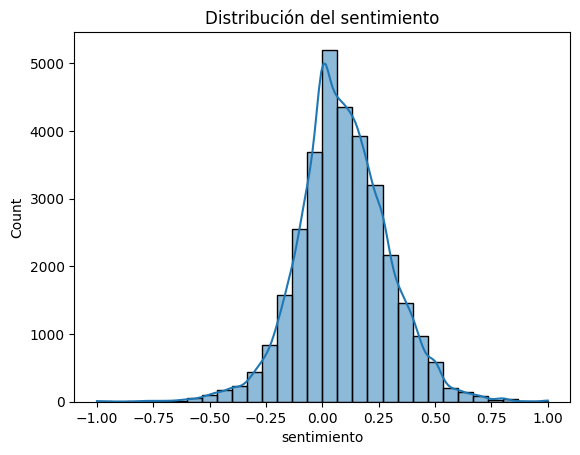

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['sentimiento'], bins=30, kde=True)
plt.title('Distribuci√≥n del sentimiento')
plt.show()

La mayor√≠a de las canciones tienden a ser m√°s positivas (recordar que la m√©trica para ver positividad solo es la cantidad de adjetivos positivos)

Artistas con sentimiento promedio m√°s positivo

In [35]:
df2.groupby('artists')['sentimiento'].mean().sort_values(ascending=False).head(10)

artists
At17                                   1.000000
3 Steps Ahead                          1.000000
Vini Vici;Pixel                        0.976562
yetep;Olmos                            0.850000
Evil Activities;Chaosphere             0.850000
Shenseea;Tyga                          0.827018
ILLENIUM;Call Me Karizma;Hex Cougar    0.800781
Neolux                                 0.800000
AcesToAces                             0.800000
HYDE                                   0.800000
Name: sentimiento, dtype: float64

Canciones m√°s positivas

In [36]:
df2.sort_values('sentimiento', ascending=False)[['song', 'artists', 'sentimiento']].head(5)  # m√°s positivas

song            artists  sentimiento
60570    The Weight Loss Plan      Patton Oswalt          1.0
69835  THE END OF THE CENTURY         Seikima-II          1.0
12475                  C.M.E.             B√∂lzer          1.0
84436           Charged Words  Western Addiction          1.0
21936   Goin' On A Berry Hunt  Dora The Explorer          1.0

Canciones m√°s negativas

In [37]:
df2.sort_values('sentimiento')[['song', 'artists', 'sentimiento']].head(5)  # m√°s negativas

song   artists  sentimiento
22776            Sentence       ERA         -1.0
35318             Mortado  Impetigo         -1.0
7518   DRAMATIC? DRASTIC!     BO√òWY         -1.0
29835               Faith     Ghost         -1.0
64618  I Wanna Be Sedated   Ramones         -1.0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

positivas = df2[df2['clasificacion'] == 'positivo']['lyrics'].dropna()
negativas = df2[df2['clasificacion'] == 'negativo']['lyrics'].dropna()

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X_pos = vectorizer.fit_transform(positivas)
print("Palabras m√°s importantes en canciones positivas:")
print(vectorizer.get_feature_names_out())

Palabras m√°s importantes en canciones positivas:
['baby' 'cause' 'come' 'don' 'feel' 'got' 'just' 'know' 'let' 'like' 'll'
 'love' 'make' 'oh' 'ooh' 'time' 've' 'wanna' 'want' 'yeah']


In [40]:
X_neg = vectorizer.fit_transform(negativas)

print("Palabras m√°s importantes en canciones negativas:")
print(vectorizer.get_feature_names_out())

Palabras m√°s importantes en canciones negativas:
['bad' 'cause' 'don' 'feel' 'fuck' 'got' 'just' 'know' 'la' 'let' 'like'
 'll' 'make' 'oh' 'say' 'time' 've' 'wanna' 'want' 'yeah']


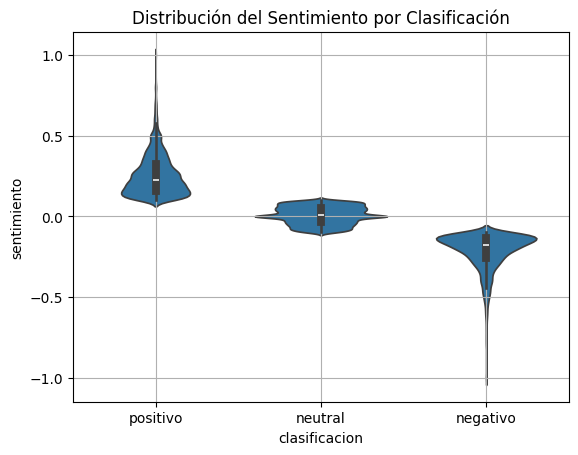

In [82]:
sns.violinplot(data=df2, x='clasificacion', y='sentimiento')
plt.title('Distribuci√≥n del Sentimiento por Clasificaci√≥n')
plt.grid()
plt.show()

## Multivariable

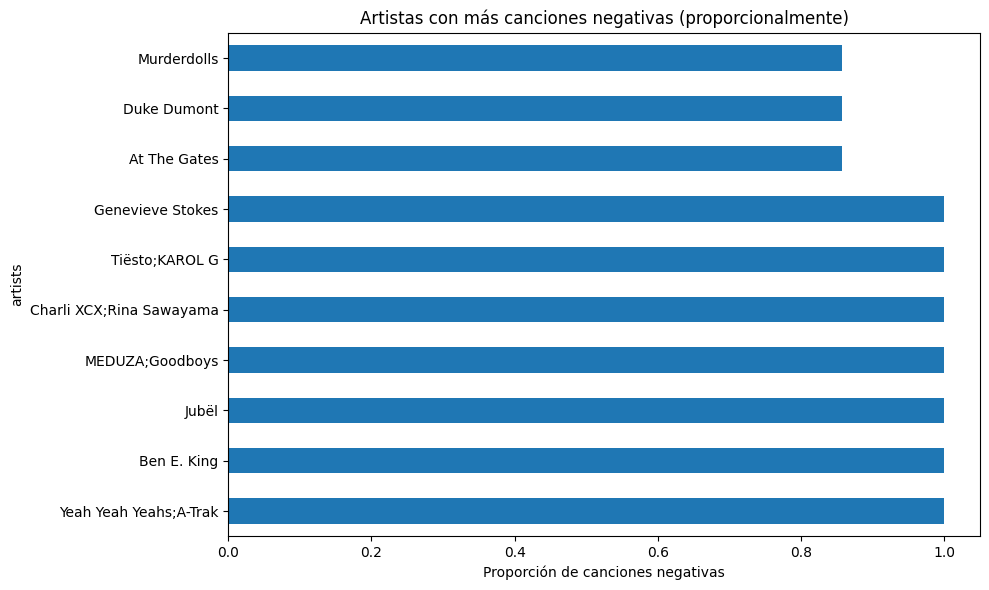

In [ ]:
# cantidad de canciones de cada tipo de sentimiento
artistas_sentimiento = df2.groupby(['artists', 'clasificacion']).size().unstack(fill_value=0)

# proporci√≥n de canciones negativas
artistas_sentimiento['total'] = artistas_sentimiento.sum(axis=1)
artistas_sentimiento['proporcion_neg'] = artistas_sentimiento['negativo'] / artistas_sentimiento['total']

# Mostrar los 10 artistas con mayor proporci√≥n de canciones negativas (y con al menos 5 canciones)
artistas_mas_negativos = artistas_sentimiento[artistas_sentimiento['total'] >= 5].sort_values('proporcion_neg', ascending=False).head(10)

artistas_mas_negativos['proporcion_neg'].plot(kind='barh', figsize=(10, 6), title='Artistas con m√°s canciones negativas (proporcionalmente)')
plt.xlabel('Proporci√≥n de canciones negativas')
plt.tight_layout()
plt.show()

In [44]:
spotify.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

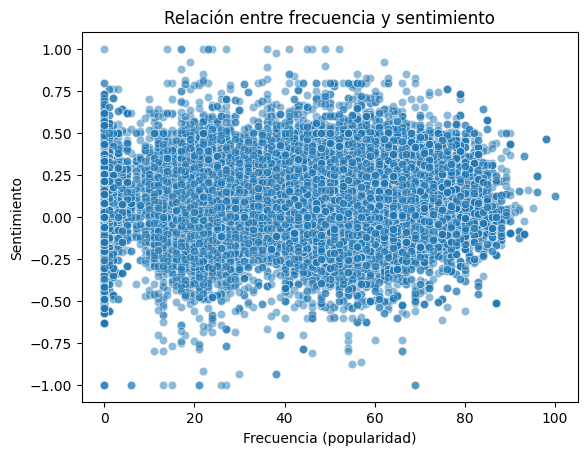

Correlaci√≥n popularity vs sentimiento: -0.042950138049776744


In [ ]:
# Aseg√∫rate de que la columna 'freq' est√© presente y sea num√©rica
spotify['freq'] = pd.to_numeric(spotify['popularity'], errors='coerce')

# Gr√°fico de dispersi√≥n
import seaborn as sns

sns.scatterplot(data=spotify, x='popularity', y='sentimiento', alpha=0.5)
plt.title('Relaci√≥n entre frecuencia y sentimiento')
plt.xlabel('Frecuencia (popularidad)')
plt.ylabel('Sentimiento')
plt.show()

# Correlaci√≥n
print("Correlaci√≥n popularity vs sentimiento:", spotify[['popularity', 'sentimiento']].corr().iloc[0,1])

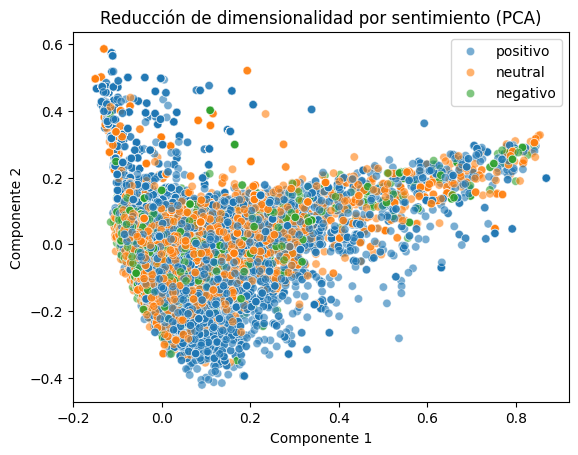

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# letras no nulas
df_filtrado = spotify[spotify['lyrics'].notnull()].copy()

# Vectorizaci√≥n TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df_filtrado['lyrics'])

# rducci√≥n con PCA (m√°s r√°pido)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

df_filtrado['pca_x'] = X_pca[:, 0]
df_filtrado['pca_y'] = X_pca[:, 1]

sns.scatterplot(data=df_filtrado, x='pca_x', y='pca_y', hue='clasificacion', alpha=0.6)
plt.title('Reducci√≥n de dimensionalidad por sentimiento (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

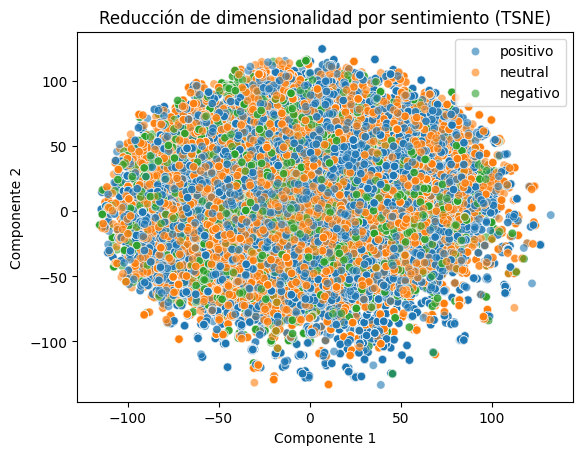

In [49]:
from sklearn.manifold import TSNE

# ahora reducci√≥n con t-SNE (m√°s lento pero m√°s expresivo visualmente)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Agregar resultado al DataFrame
df_filtrado['pca_x'] = X_tsne[:, 0]
df_filtrado['pca_y'] = X_tsne[:, 1]

sns.scatterplot(data=df_filtrado, x='pca_x', y='pca_y', hue='clasificacion', alpha=0.6)
plt.title('Reducci√≥n de dimensionalidad por sentimiento (TSNE)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

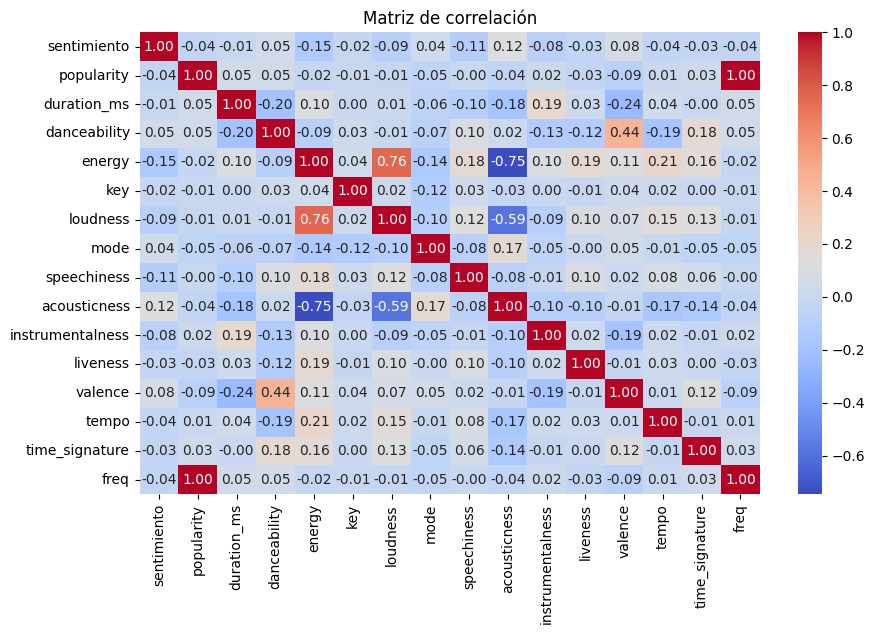

In [50]:
# Seleccionar columnas num√©ricas
numericas = spotify.select_dtypes(include='number')

# Matriz de correlaci√≥n
plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()

## Caracter√≠sticas de canciones

In [53]:
spotify["artists"] = spotify["artists_x"]

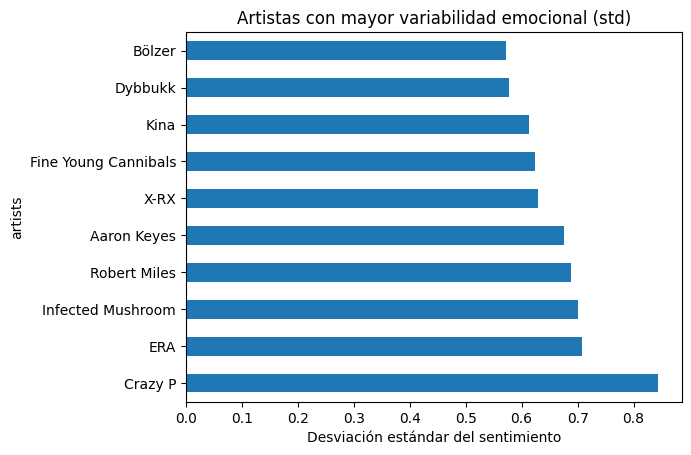

In [54]:
# Desviaci√≥n est√°ndar del sentimiento por artista
variabilidad = spotify.groupby('artists')['sentimiento'].std().dropna().sort_values(ascending=False).head(10)

variabilidad.plot(kind='barh', title='Artistas con mayor variabilidad emocional (std)')
plt.xlabel('Desviaci√≥n est√°ndar del sentimiento')
plt.show()

Palabras m√°s representativas

In [55]:
top_generos = spotify['track_genre'].value_counts().head(10).index

for genero in top_generos:
    letras = spotify[spotify['track_genre'] == genero]['lyrics'].dropna()
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform(letras)
    print(f"\nüéß Palabras m√°s representativas para el g√©nero '{genero}':")
    print(", ".join(vectorizer.get_feature_names_out()))


üéß Palabras m√°s representativas para el g√©nero 'grunge':
away, don, just, know, like, ll, oh, time, ve, yeah

üéß Palabras m√°s representativas para el g√©nero 'metalcore':
don, feel, just, know, let, like, ll, oh, time, ve

üéß Palabras m√°s representativas para el g√©nero 'country':
christmas, don, got, just, know, like, ll, love, oh, yeah

üéß Palabras m√°s representativas para el g√©nero 'soul':
baby, christmas, don, feel, just, know, like, love, oh, yeah

üéß Palabras m√°s representativas para el g√©nero 'sad':
cause, don, got, just, know, like, ll, love, wanna, yeah

üéß Palabras m√°s representativas para el g√©nero 'dance':
baby, don, just, know, la, let, like, love, oh, yeah

üéß Palabras m√°s representativas para el g√©nero 'rock':
christmas, don, just, know, like, little, oh, thunder, time, ve

üéß Palabras m√°s representativas para el g√©nero 'metal':
away, don, just, know, like, ll, love, oh, ve, yeah

üéß Palabras m√°s representativas para el g√©nero 'alternat

Esas ser√≠an las m√°s representativas pero se repiten entre g√©neros, asi que son representativas de la m√∫sica en ingl√©s en general.

Para ver las palabras que distinguen un g√©nero de otro, calculamos tf-idf con todas las letrsa disponibles (demora un poco m√°s en correr que el de arriba):

In [ ]:
spotify_filtrado = spotify.dropna(subset=['lyrics'])

# TF-IDF con todo el corpus
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(spotify_filtrado['lyrics'])
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df['track_genre'] = spotify_filtrado['track_genre'].values

# Ver los g√©neros m√°s comunes
top_generos = spotify_filtrado['track_genre'].value_counts().head(10).index

for genero in top_generos:
    media = tfidf_df[tfidf_df['track_genre'] == genero].drop(columns='track_genre').mean()
    top_words = media.sort_values(ascending=False).head(10) # podemos ver m√°s palabras subiendo el 10
    print(f"\nüéß Palabras m√°s representativas del g√©nero '{genero}':")
    print(", ".join(top_words.index))


üéß Palabras m√°s representativas del g√©nero 'grunge':
away, ll, don, ve, know, oh, like, just, yeah, let

üéß Palabras m√°s representativas del g√©nero 'metalcore':
don, know, ve, ll, just, like, let, feel, away, fucking

üéß Palabras m√°s representativas del g√©nero 'country':
christmas, don, like, love, just, got, oh, ain, ll, know

üéß Palabras m√°s representativas del g√©nero 'soul':
christmas, oh, love, yeah, baby, claus, know, santa, merry, don

üéß Palabras m√°s representativas del g√©nero 'sad':
don, yeah, know, like, just, love, wanna, got, ll, cause

üéß Palabras m√°s representativas del g√©nero 'dance':
oh, la, yeah, baby, like, know, don, love, just, got

üéß Palabras m√°s representativas del g√©nero 'rock':
oh, christmas, don, ooh, yeah, nick, merry, ll, know, time

üéß Palabras m√°s representativas del g√©nero 'metal':
oh, ve, don, know, away, ll, love, just, yeah, like

üéß Palabras m√°s representativas del g√©nero 'alternative':
oh, don, yeah, love, know, ll

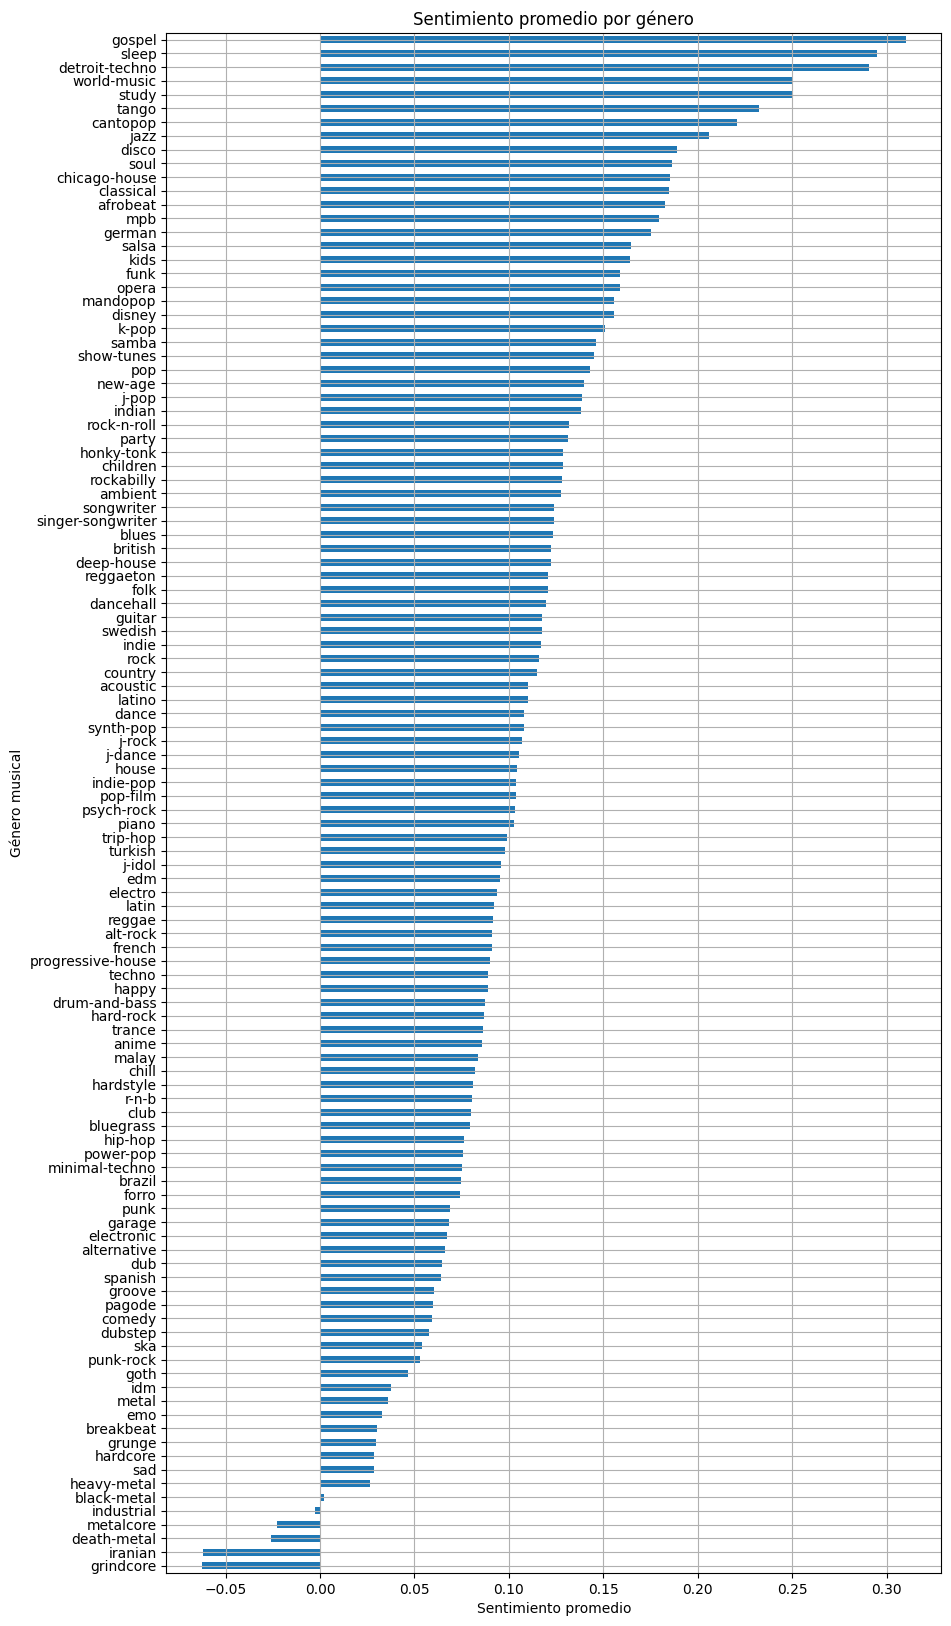

In [60]:
genero_sentimiento = spotify.groupby('track_genre')['sentimiento'].mean().sort_values()

# Mostrar los m√°s felices y m√°s tristes
genero_sentimiento.plot(kind='barh', figsize=(10, 20), title='Sentimiento promedio por g√©nero')
plt.xlabel('Sentimiento promedio')
plt.ylabel('G√©nero musical')
plt.grid()
plt.show()

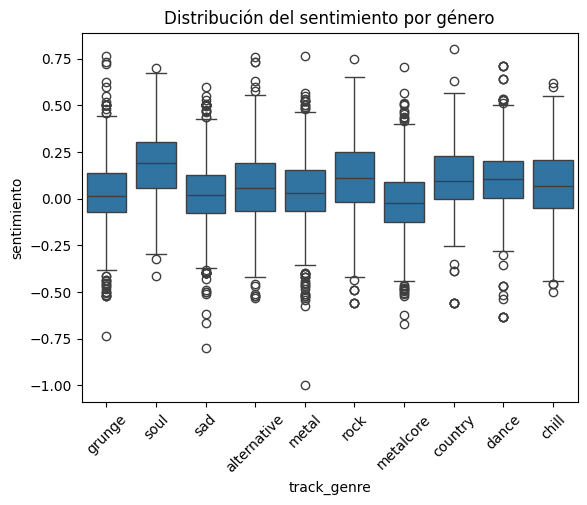

In [57]:
sns.boxplot(data=spotify[spotify['track_genre'].isin(top_generos)], x='track_genre', y='sentimiento')
plt.title('Distribuci√≥n del sentimiento por g√©nero')
plt.xticks(rotation=45)
plt.show()

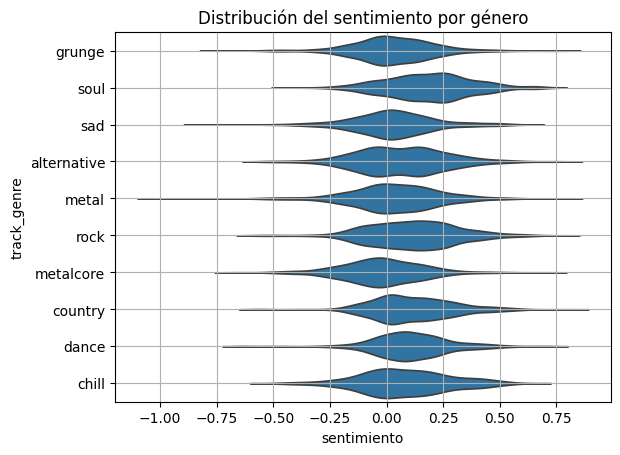

In [72]:
sns.violinplot(data=spotify[spotify['track_genre'].isin(top_generos)], 
               x='sentimiento', y='track_genre', orient='h', inner=None, scale='width')
plt.title('Distribuci√≥n del sentimiento por g√©nero')
plt.grid()
plt.show()

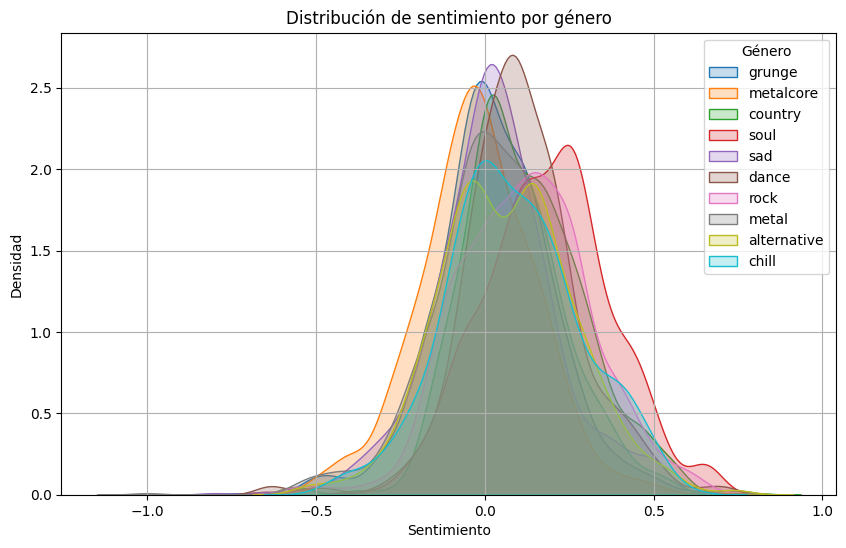

In [73]:
plt.figure(figsize=(10, 6))

for genero in top_generos:
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], label=genero, shade=True, common_norm=False)

plt.title('Distribuci√≥n de sentimiento por g√©nero')
plt.xlabel('Sentimiento')
plt.ylabel('Densidad')
plt.legend(title='G√©nero')
plt.grid()
plt.show()

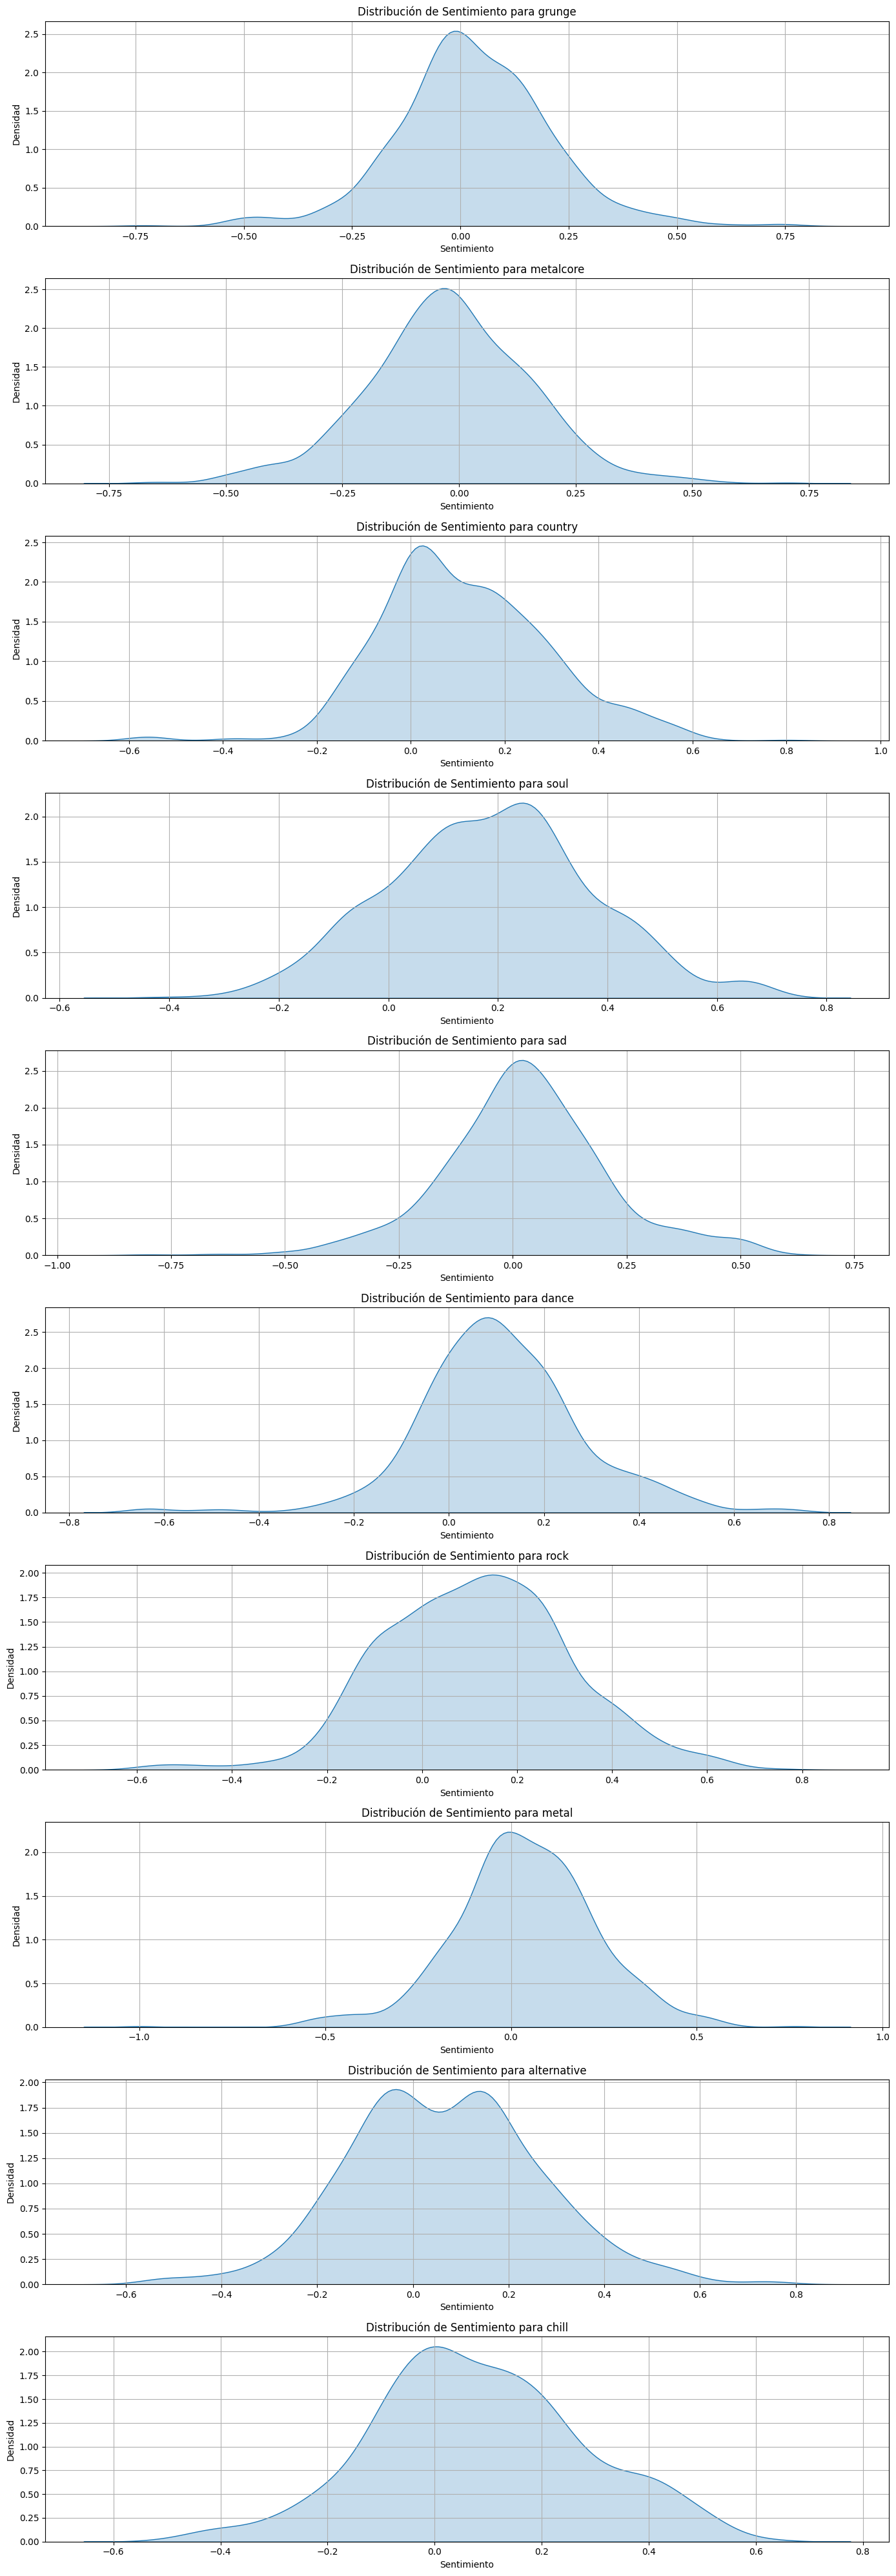

In [81]:
fig, axes = plt.subplots(len(top_generos), 1, figsize=(14, 4 * len(top_generos)))

for i, genero in enumerate(top_generos):
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], ax=axes[i], shade=True, common_norm=False)
    axes[i].set_title(f'Distribuci√≥n de Sentimiento para {genero}')
    axes[i].set_xlabel('Sentimiento')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True) 

plt.tight_layout()
plt.show()

In [65]:
clasif_genero = spotify.groupby('track_genre')['clasificacion'].agg(lambda x: x.mode()[0])
clasif_genero = pd.DataFrame(clasif_genero)
clasif_genero

clasificacion
track_genre              
acoustic         positivo
afrobeat         positivo
alt-rock         positivo
alternative      positivo
ambient          positivo
...                   ...
techno           positivo
trance           positivo
trip-hop         positivo
turkish          positivo
world-music      positivo

[112 rows x 1 columns]